In [66]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [68]:
conn=sqlite3.connect("C:\\Users\\arnau\\OneDrive\\Bureau\\db sqlite\\DemoDB.db")

In [69]:
df=pd.read_sql_query("SELECT * FROM Previsions",conn)

In [70]:
df

,Produit,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,Produit 1,10,32,55,45,38,45,55,55,50,...,40,50,49,56,59,71,55,41,62,48
1,Produit 10,6,37,49,39,46,59,48,49,58,...,45,43,67,40,59,40,44,48,54,47
2,Produit 11,8,49,46,47,48,54,62,84,51,...,51,38,40,44,50,67,55,40,59,47
3,Produit 12,6,47,40,55,67,80,54,47,48,...,53,55,36,40,44,40,67,63,50,62
4,Produit 13,9,42,50,43,41,51,50,46,40,...,50,53,35,56,66,48,54,60,37,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Produit 79,9,49,51,45,60,51,42,53,56,...,49,49,44,34,48,47,41,58,51,45
76,Produit 8,3,69,64,37,47,46,60,71,54,...,52,44,44,51,47,46,47,46,33,51
77,Produit 80,5,47,57,37,36,50,55,40,53,...,62,50,58,47,35,46,46,49,51,45
78,Produit 9,12,34,41,50,47,39,56,40,49,...,52,44,42,47,51,43,42,49,66,47


In [71]:
df=df.transpose()
df

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
Produit,Produit 1,Produit 10,Produit 11,Produit 12,Produit 13,Produit 14,Produit 15,Produit 16,Produit 17,Produit 18,...,Produit 74,Produit 75,Produit 76,Produit 77,Produit 78,Produit 79,Produit 8,Produit 80,Produit 9,Produit 25
1,10,6,8,6,9,13,12,3,10,5,...,3,3,11,7,3,9,3,5,12,10
2,32,37,49,47,42,38,47,58,59,50,...,62,44,40,66,53,49,69,47,34,59
3,55,49,46,40,50,52,28,31,44,46,...,55,44,60,69,55,51,64,57,41,44
4,45,39,47,55,43,33,35,44,32,45,...,57,54,58,41,45,45,37,37,50,44
5,38,46,48,67,41,54,44,53,37,54,...,32,63,52,54,47,60,47,36,47,70
6,45,59,54,80,51,47,54,44,41,47,...,39,49,65,35,46,51,46,50,39,49
7,55,48,62,54,50,62,51,42,50,65,...,45,42,49,53,56,42,60,55,56,60
8,55,49,84,47,46,50,57,53,59,55,...,56,54,38,49,55,53,71,40,40,41
9,50,58,51,48,40,54,50,55,57,54,...,53,40,56,58,52,56,54,53,49,59


In [72]:
df. columns = df. iloc[0]
df

Produit,Produit 1,Produit 10,Produit 11,Produit 12,Produit 13,Produit 14,Produit 15,Produit 16,Produit 17,Produit 18,...,Produit 74,Produit 75,Produit 76,Produit 77,Produit 78,Produit 79,Produit 8,Produit 80,Produit 9,Produit 25
Produit,Produit 1,Produit 10,Produit 11,Produit 12,Produit 13,Produit 14,Produit 15,Produit 16,Produit 17,Produit 18,...,Produit 74,Produit 75,Produit 76,Produit 77,Produit 78,Produit 79,Produit 8,Produit 80,Produit 9,Produit 25
1,10,6,8,6,9,13,12,3,10,5,...,3,3,11,7,3,9,3,5,12,10
2,32,37,49,47,42,38,47,58,59,50,...,62,44,40,66,53,49,69,47,34,59
3,55,49,46,40,50,52,28,31,44,46,...,55,44,60,69,55,51,64,57,41,44
4,45,39,47,55,43,33,35,44,32,45,...,57,54,58,41,45,45,37,37,50,44
5,38,46,48,67,41,54,44,53,37,54,...,32,63,52,54,47,60,47,36,47,70
6,45,59,54,80,51,47,54,44,41,47,...,39,49,65,35,46,51,46,50,39,49
7,55,48,62,54,50,62,51,42,50,65,...,45,42,49,53,56,42,60,55,56,60
8,55,49,84,47,46,50,57,53,59,55,...,56,54,38,49,55,53,71,40,40,41
9,50,58,51,48,40,54,50,55,57,54,...,53,40,56,58,52,56,54,53,49,59


In [73]:
df = df[1:]

In [74]:
df

Produit,Produit 1,Produit 10,Produit 11,Produit 12,Produit 13,Produit 14,Produit 15,Produit 16,Produit 17,Produit 18,...,Produit 74,Produit 75,Produit 76,Produit 77,Produit 78,Produit 79,Produit 8,Produit 80,Produit 9,Produit 25
1,10,6,8,6,9,13,12,3,10,5,...,3,3,11,7,3,9,3,5,12,10
2,32,37,49,47,42,38,47,58,59,50,...,62,44,40,66,53,49,69,47,34,59
3,55,49,46,40,50,52,28,31,44,46,...,55,44,60,69,55,51,64,57,41,44
4,45,39,47,55,43,33,35,44,32,45,...,57,54,58,41,45,45,37,37,50,44
5,38,46,48,67,41,54,44,53,37,54,...,32,63,52,54,47,60,47,36,47,70
6,45,59,54,80,51,47,54,44,41,47,...,39,49,65,35,46,51,46,50,39,49
7,55,48,62,54,50,62,51,42,50,65,...,45,42,49,53,56,42,60,55,56,60
8,55,49,84,47,46,50,57,53,59,55,...,56,54,38,49,55,53,71,40,40,41
9,50,58,51,48,40,54,50,55,57,54,...,53,40,56,58,52,56,54,53,49,59
10,53,52,67,49,46,62,54,61,54,38,...,46,60,45,68,47,44,48,50,44,52


In [75]:
cols = len(df.axes[1])
rows=len(df.axes[0])
cols
rows

26

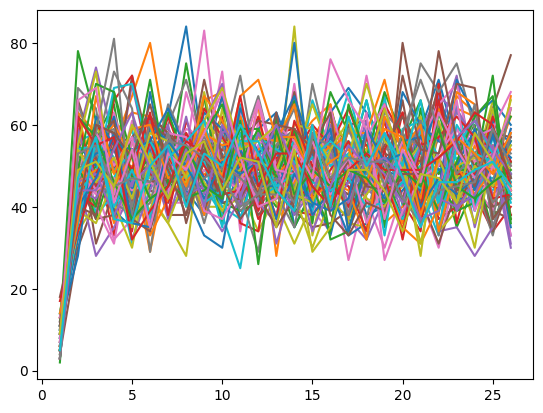

In [76]:
X=range(1,rows+1,1)
for i in range(cols) :
    produit="Produit " + str(i+1)
    Y=df[produit]
    plt.plot(X,Y)

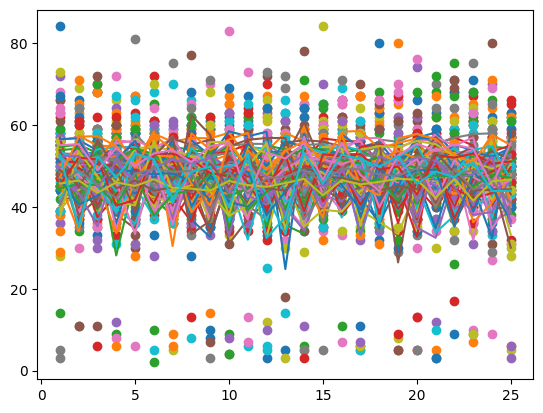

In [77]:
#réalisation de la régression polynomiale de degré 2
Z=range(1,rows,1)
Z=np.array(Z)
polynomial_features=PolynomialFeatures(degree=2)
poly_regression_alg=LinearRegression()
#Construction du modèle de régression linéaire polynomiale
model=Pipeline([
    ("polynomial_features",polynomial_features),
    ("linear_regression",poly_regression_alg)
    ])
Z=Z.reshape(-1,1)
bibliotheque = pd.DataFrame()

for j in range(cols) :
    produit="Produit " + str(j+1)
    x_train,x_test,y_train, y_test =train_test_split(X,df[produit],test_size=1)
    x_train=np.array(x_train)
    x_train=x_train.reshape(-1,1)
    model.fit(x_train,y_train)
    train_prediction=model.predict(x_train)
    predictions=np.concatenate(([produit], train_prediction))
    predictions=pd.DataFrame([predictions],columns=(range(rows,52,1)))
    bibliotheque = pd.concat([bibliotheque,predictions], ignore_index=True)
    plt.plot(Z,train_prediction)
    plt.scatter(Z,y_train)

In [78]:
bibliotheque = bibliotheque.rename(columns={26: "Produit"})
bibliotheque.to_sql("Prev_Produits",conn,if_exists='replace',index=False)


#Ecriture dans la base et recalculs des besoins dans la base de données SQLite et requêtes SQL:

#Ecriture des calculs des besoins matériels
df2=pd.read_sql_query("SELECT 'Composant 1' As 'Composant', ROUND(SUM(R1.'27'*R1.Composant_1),0) AS '27', ROUND(SUM(R1.'28'*R1.Composant_1),0) AS '28', ROUND(SUM(R1.'29'*R1.Composant_1),0) AS '29', ROUND(SUM(R1.'30'*R1.Composant_1),0) AS '30', ROUND(SUM(R1.'31'*R1.Composant_1),0) AS '31', ROUND(SUM(R1.'32'*R1.Composant_1),0) AS '32' FROM (SELECT CP.*,PP.* from Composants_produits CP INNER JOIN Prev_Produits PP ON UPPER(PP.Produit)=Upper(CP.Produit))R1 UNION SELECT 'Composant 2' As 'Composant', ROUND(SUM(R2.'27'*R2.Composant_2),0) AS '27', ROUND(SUM(R2.'28'*R2.Composant_2),0) AS '28', ROUND(SUM(R2.'29'*R2.Composant_2),0) AS '29', ROUND(SUM(R2.'30'*R2.Composant_2),0) AS '30', ROUND(SUM(R2.'31'*R2.Composant_2),0) AS '31', ROUND(SUM(R2.'32'*R2.Composant_2),0) AS '32' FROM (SELECT CP.*,PP.* from Composants_produits CP INNER JOIN Prev_Produits PP ON UPPER(PP.Produit)=Upper(CP.Produit))R2 UNION SELECT 'Composant 3' As 'Composant', ROUND(SUM(R3.'27'*R3.Composant_3),0) AS '27', ROUND(SUM(R3.'28'*R3.Composant_3),0) AS '28', ROUND(SUM(R3.'29'*R3.Composant_3),0) AS '29', ROUND(SUM(R3.'30'*R3.Composant_3),0) AS '30', ROUND(SUM(R3.'31'*R3.Composant_3),0) AS '31', ROUND(SUM(R3.'32'*R3.Composant_3),0) AS '32' FROM (SELECT CP.*,PP.* from Composants_produits CP INNER JOIN Prev_Produits PP ON UPPER(PP.Produit)=Upper(CP.Produit))R3 UNION SELECT 'Composant 4' As 'Composant', ROUND(SUM(R4.'27'*R4.Composant_4),0) AS '27', ROUND(SUM(R4.'28'*R4.Composant_4),0) AS '28', ROUND(SUM(R4.'29'*R4.Composant_4),0) AS '29', ROUND(SUM(R4.'30'*R4.Composant_4),0) AS '30', ROUND(SUM(R4.'31'*R4.Composant_4),0) AS '31', ROUND(SUM(R4.'32'*R4.Composant_4),0) AS '32' FROM (SELECT CP.*,PP.* from Composants_produits CP INNER JOIN Prev_Produits PP ON UPPER(PP.Produit)=Upper(CP.Produit))R4 UNION SELECT 'Composant 5' As 'Composant', ROUND(SUM(R5.'27'*R5.Composant_5),0) AS '27', ROUND(SUM(R5.'28'*R5.Composant_5),0) AS '28', ROUND(SUM(R5.'29'*R5.Composant_5),0) AS '29', ROUND(SUM(R5.'30'*R5.Composant_5),0) AS '30', ROUND(SUM(R5.'31'*R5.Composant_5),0) AS '31', ROUND(SUM(R5.'32'*R5.Composant_5),0) AS '32' FROM (SELECT CP.*,PP.* from Composants_produits CP INNER JOIN Prev_Produits PP ON UPPER(PP.Produit)=Upper(CP.Produit))R5 UNION SELECT 'Composant 6' As 'Composant', ROUND(SUM(R6.'27'*R6.Composant_6),0) AS '27', ROUND(SUM(R6.'28'*R6.Composant_6),0) AS '28', ROUND(SUM(R6.'29'*R6.Composant_6),0) AS '29', ROUND(SUM(R6.'30'*R6.Composant_6),0) AS '30', ROUND(SUM(R6.'31'*R6.Composant_6),0) AS '31', ROUND(SUM(R6.'32'*R6.Composant_6),0) AS '32' FROM (SELECT CP.*,PP.* from Composants_produits CP INNER JOIN Prev_Produits PP ON UPPER(PP.Produit)=Upper(CP.Produit))R6 UNION SELECT 'Composant 7' As 'Composant', ROUND(SUM(R7.'27'*R7.Composant_7),0) AS '27', ROUND(SUM(R7.'28'*R7.Composant_7),0) AS '28', ROUND(SUM(R7.'29'*R7.Composant_7),0) AS '29', ROUND(SUM(R7.'30'*R7.Composant_7),0) AS '30', ROUND(SUM(R7.'31'*R7.Composant_7),0) AS '31', ROUND(SUM(R7.'32'*R7.Composant_7),0) AS '32' FROM (SELECT CP.*,PP.* from Composants_produits CP INNER JOIN Prev_Produits PP ON UPPER(PP.Produit)=Upper(CP.Produit))R7 UNION SELECT 'Composant 8' As 'Composant', ROUND(SUM(R8.'27'*R8.Composant_8),0) AS '27', ROUND(SUM(R8.'28'*R8.Composant_8),0) AS '28', ROUND(SUM(R8.'29'*R8.Composant_8),0) AS '29', ROUND(SUM(R8.'30'*R8.Composant_8),0) AS '30', ROUND(SUM(R8.'31'*R8.Composant_8),0) AS '31', ROUND(SUM(R8.'32'*R8.Composant_8),0) AS '32' FROM (SELECT CP.*,PP.* from Composants_produits CP INNER JOIN Prev_Produits PP ON UPPER(PP.Produit)=Upper(CP.Produit))R8 UNION SELECT 'Composant 9' As 'Composant', ROUND(SUM(R9.'27'*R9.Composant_9),0) AS '27', ROUND(SUM(R9.'28'*R9.Composant_9),0) AS '28', ROUND(SUM(R9.'29'*R9.Composant_9),0) AS '29', ROUND(SUM(R9.'30'*R9.Composant_9),0) AS '30', ROUND(SUM(R9.'31'*R9.Composant_9),0) AS '31', ROUND(SUM(R9.'32'*R9.Composant_9),0) AS '32' FROM (SELECT CP.*,PP.* from Composants_produits CP INNER JOIN Prev_Produits PP ON UPPER(PP.Produit)=Upper(CP.Produit))R9 UNION SELECT 'Composant 10' As 'Composant', ROUND(SUM(R10.'27'*R10.Composant_10),0) AS '27', ROUND(SUM(R10.'28'*R10.Composant_10),0) AS '28', ROUND(SUM(R10.'29'*R10.Composant_10),0) AS '29', ROUND(SUM(R10.'30'*R10.Composant_10),0) AS '30', ROUND(SUM(R10.'31'*R10.Composant_10),0) AS '31', ROUND(SUM(R10.'32'*R10.Composant_10),0) AS '32' FROM (SELECT CP.*,PP.* from Composants_produits CP INNER JOIN Prev_Produits PP ON UPPER(PP.Produit)=Upper(CP.Produit))R10",conn) 

df2.to_sql('Besoin_Materiel',conn,if_exists='replace',index=False)


#Ecriture des calculs des besoins ETP
df3=pd.read_sql_query("SELECT PP.Produit, ROUND(((PP.'27')*EEP.Equiv_ETP_semaine))+1 As '27', ROUND(((PP.'28')*EEP.Equiv_ETP_semaine))+1 As '28', ROUND(((PP.'29')*EEP.Equiv_ETP_semaine))+1 As '29', ROUND(((PP.'30')*EEP.Equiv_ETP_semaine))+1 As '30', ROUND(((PP.'31')*EEP.Equiv_ETP_semaine))+1 As '31', ROUND(((PP.'32')*EEP.Equiv_ETP_semaine))+1 As '32' FROM Prev_Produits PP JOIN Equiv_ETP_Produits EEP ON UPPER(EEP.Produit)=UPPER(PP.Produit)",conn)
df3.to_sql('Besoin_ETP',conn,if_exists='replace',index=False)


#Ecriture des calculs de prévision du CA
df4=pd.read_sql_query("SELECT 27 as 'Semaine', SUM(ROUND(PP.'27')*PVP.Prix_vente) As 'CA' FROM Prev_Produits PP JOIN Prix_vente_Produit PVP ON UPPER(PP.Produit)=UPPER(PVP.Produit) UNION SELECT 28 as 'Semaine', SUM(ROUND(PP.'28')*PVP.Prix_vente) As 'CA' FROM Prev_Produits PP JOIN Prix_vente_Produit PVP ON UPPER(PP.Produit)=UPPER(PVP.Produit) UNION SELECT 29 as 'Semaine', SUM(ROUND(PP.'29')*PVP.Prix_vente) As 'CA' FROM Prev_Produits PP JOIN Prix_vente_Produit PVP ON UPPER(PP.Produit)=UPPER(PVP.Produit) UNION SELECT 30 as 'Semaine', SUM(ROUND(PP.'30')*PVP.Prix_vente) As 'CA' FROM Prev_Produits PP JOIN Prix_vente_Produit PVP ON UPPER(PP.Produit)=UPPER(PVP.Produit) UNION SELECT 31 as 'Semaine', SUM(ROUND(PP.'31')*PVP.Prix_vente) As 'CA' FROM Prev_Produits PP JOIN Prix_vente_Produit PVP ON UPPER(PP.Produit)=UPPER(PVP.Produit) UNION SELECT 32 as 'Semaine', SUM(ROUND(PP.'32')*PVP.Prix_vente) As 'CA' FROM Prev_Produits PP JOIN Prix_vente_Produit PVP ON UPPER(PP.Produit)=UPPER(PVP.Produit)",conn)
df4.to_sql('Prev_CA',conn,if_exists='replace',index=False)

#Ecriture des calculs des besoins matériels passés

df5=pd.read_sql_query("SELECT 'Composant 1' As 'Composant', ROUND(SUM(R1.'1'*R1.Composant_1),0) AS '1', ROUND(SUM(R1.'2'*R1.Composant_1),0) AS '2', ROUND(SUM(R1.'3'*R1.Composant_1),0) AS '3', ROUND(SUM(R1.'4'*R1.Composant_1),0) AS '4', ROUND(SUM(R1.'5'*R1.Composant_1),0) AS '5', ROUND(SUM(R1.'6'*R1.Composant_1),0) AS '6', ROUND(SUM(R1.'7'*R1.Composant_1),0) AS '7', ROUND(SUM(R1.'8'*R1.Composant_1),0) AS '8', ROUND(SUM(R1.'9'*R1.Composant_1),0) AS '9', ROUND(SUM(R1.'10'*R1.Composant_1),0) AS '10', ROUND(SUM(R1.'11'*R1.Composant_1),0) AS '11', ROUND(SUM(R1.'12'*R1.Composant_1),0) AS '12', ROUND(SUM(R1.'13'*R1.Composant_1),0) AS '13', ROUND(SUM(R1.'14'*R1.Composant_1),0) AS '14', ROUND(SUM(R1.'15'*R1.Composant_1),0) AS '15', ROUND(SUM(R1.'16'*R1.Composant_1),0) AS '16', ROUND(SUM(R1.'17'*R1.Composant_1),0) AS '17', ROUND(SUM(R1.'18'*R1.Composant_1),0) AS '18', ROUND(SUM(R1.'19'*R1.Composant_1),0) AS '19', ROUND(SUM(R1.'20'*R1.Composant_1),0) AS '20', ROUND(SUM(R1.'21'*R1.Composant_1),0) AS '21', ROUND(SUM(R1.'22'*R1.Composant_1),0) AS '22', ROUND(SUM(R1.'23'*R1.Composant_1),0) AS '23', ROUND(SUM(R1.'24'*R1.Composant_1),0) AS '24', ROUND(SUM(R1.'25'*R1.Composant_1),0) AS '25', ROUND(SUM(R1.'26'*R1.Composant_1),0) AS '26' FROM (SELECT CP.*,PP.* from Composants_produits CP INNER JOIN Previsions PP ON UPPER(PP.Produit)=Upper(CP.Produit))R1 UNION SELECT 'Composant 2' As 'Composant', ROUND(SUM(R2.'1'*R2.Composant_2),0) AS '1', ROUND(SUM(R2.'2'*R2.Composant_2),0) AS '2', ROUND(SUM(R2.'3'*R2.Composant_2),0) AS '3', ROUND(SUM(R2.'4'*R2.Composant_2),0) AS '4', ROUND(SUM(R2.'5'*R2.Composant_2),0) AS '5', ROUND(SUM(R2.'6'*R2.Composant_2),0) AS '6', ROUND(SUM(R2.'7'*R2.Composant_2),0) AS '7', ROUND(SUM(R2.'8'*R2.Composant_2),0) AS '8', ROUND(SUM(R2.'9'*R2.Composant_2),0) AS '9', ROUND(SUM(R2.'10'*R2.Composant_2),0) AS '10', ROUND(SUM(R2.'11'*R2.Composant_2),0) AS '11', ROUND(SUM(R2.'12'*R2.Composant_2),0) AS '12', ROUND(SUM(R2.'13'*R2.Composant_2),0) AS '13', ROUND(SUM(R2.'14'*R2.Composant_2),0) AS '14', ROUND(SUM(R2.'15'*R2.Composant_2),0) AS '15', ROUND(SUM(R2.'16'*R2.Composant_2),0) AS '16', ROUND(SUM(R2.'17'*R2.Composant_2),0) AS '17', ROUND(SUM(R2.'18'*R2.Composant_2),0) AS '18', ROUND(SUM(R2.'19'*R2.Composant_2),0) AS '19', ROUND(SUM(R2.'20'*R2.Composant_2),0) AS '20', ROUND(SUM(R2.'21'*R2.Composant_2),0) AS '21', ROUND(SUM(R2.'22'*R2.Composant_2),0) AS '22', ROUND(SUM(R2.'23'*R2.Composant_2),0) AS '23', ROUND(SUM(R2.'24'*R2.Composant_2),0) AS '24', ROUND(SUM(R2.'25'*R2.Composant_2),0) AS '25', ROUND(SUM(R2.'26'*R2.Composant_2),0) AS '26' FROM (SELECT CP.*,PP.* from Composants_produits CP INNER JOIN Previsions PP ON UPPER(PP.Produit)=Upper(CP.Produit))R2 UNION SELECT 'Composant 3' As 'Composant', ROUND(SUM(R3.'1'*R3.Composant_3),0) AS '1', ROUND(SUM(R3.'2'*R3.Composant_3),0) AS '2', ROUND(SUM(R3.'3'*R3.Composant_3),0) AS '3', ROUND(SUM(R3.'4'*R3.Composant_3),0) AS '4', ROUND(SUM(R3.'5'*R3.Composant_3),0) AS '5', ROUND(SUM(R3.'6'*R3.Composant_3),0) AS '6', ROUND(SUM(R3.'7'*R3.Composant_3),0) AS '7', ROUND(SUM(R3.'8'*R3.Composant_3),0) AS '8', ROUND(SUM(R3.'9'*R3.Composant_3),0) AS '9', ROUND(SUM(R3.'10'*R3.Composant_3),0) AS '10', ROUND(SUM(R3.'11'*R3.Composant_3),0) AS '11', ROUND(SUM(R3.'12'*R3.Composant_3),0) AS '12', ROUND(SUM(R3.'13'*R3.Composant_3),0) AS '13', ROUND(SUM(R3.'14'*R3.Composant_3),0) AS '14', ROUND(SUM(R3.'15'*R3.Composant_3),0) AS '15', ROUND(SUM(R3.'16'*R3.Composant_3),0) AS '16', ROUND(SUM(R3.'17'*R3.Composant_3),0) AS '17', ROUND(SUM(R3.'18'*R3.Composant_3),0) AS '18', ROUND(SUM(R3.'19'*R3.Composant_3),0) AS '19', ROUND(SUM(R3.'20'*R3.Composant_3),0) AS '20', ROUND(SUM(R3.'21'*R3.Composant_3),0) AS '21', ROUND(SUM(R3.'22'*R3.Composant_3),0) AS '22', ROUND(SUM(R3.'23'*R3.Composant_3),0) AS '23', ROUND(SUM(R3.'24'*R3.Composant_3),0) AS '24', ROUND(SUM(R3.'25'*R3.Composant_3),0) AS '25', ROUND(SUM(R3.'26'*R3.Composant_3),0) AS '26' FROM (SELECT CP.*,PP.* from Composants_produits CP INNER JOIN Previsions PP ON UPPER(PP.Produit)=Upper(CP.Produit))R3 UNION SELECT 'Composant 4' As 'Composant', ROUND(SUM(R4.'1'*R4.Composant_4),0) AS '1', ROUND(SUM(R4.'2'*R4.Composant_4),0) AS '2', ROUND(SUM(R4.'3'*R4.Composant_4),0) AS '3', ROUND(SUM(R4.'4'*R4.Composant_4),0) AS '4', ROUND(SUM(R4.'5'*R4.Composant_4),0) AS '5', ROUND(SUM(R4.'6'*R4.Composant_4),0) AS '6', ROUND(SUM(R4.'7'*R4.Composant_4),0) AS '7', ROUND(SUM(R4.'8'*R4.Composant_4),0) AS '8', ROUND(SUM(R4.'9'*R4.Composant_4),0) AS '9', ROUND(SUM(R4.'10'*R4.Composant_4),0) AS '10', ROUND(SUM(R4.'11'*R4.Composant_4),0) AS '11', ROUND(SUM(R4.'12'*R4.Composant_4),0) AS '12', ROUND(SUM(R4.'13'*R4.Composant_4),0) AS '13', ROUND(SUM(R4.'14'*R4.Composant_4),0) AS '14', ROUND(SUM(R4.'15'*R4.Composant_4),0) AS '15', ROUND(SUM(R4.'16'*R4.Composant_4),0) AS '16', ROUND(SUM(R4.'17'*R4.Composant_4),0) AS '17', ROUND(SUM(R4.'18'*R4.Composant_4),0) AS '18', ROUND(SUM(R4.'19'*R4.Composant_4),0) AS '19', ROUND(SUM(R4.'20'*R4.Composant_4),0) AS '20', ROUND(SUM(R4.'21'*R4.Composant_4),0) AS '21', ROUND(SUM(R4.'22'*R4.Composant_4),0) AS '22', ROUND(SUM(R4.'23'*R4.Composant_4),0) AS '23', ROUND(SUM(R4.'24'*R4.Composant_4),0) AS '24', ROUND(SUM(R4.'25'*R4.Composant_4),0) AS '25', ROUND(SUM(R4.'26'*R4.Composant_4),0) AS '26' FROM (SELECT CP.*,PP.* from Composants_produits CP INNER JOIN Previsions PP ON UPPER(PP.Produit)=Upper(CP.Produit))R4 UNION SELECT 'Composant 5' As 'Composant', ROUND(SUM(R5.'1'*R5.Composant_5),0) AS '1', ROUND(SUM(R5.'2'*R5.Composant_5),0) AS '2', ROUND(SUM(R5.'3'*R5.Composant_5),0) AS '3', ROUND(SUM(R5.'4'*R5.Composant_5),0) AS '4', ROUND(SUM(R5.'5'*R5.Composant_5),0) AS '5', ROUND(SUM(R5.'6'*R5.Composant_5),0) AS '6', ROUND(SUM(R5.'7'*R5.Composant_5),0) AS '7', ROUND(SUM(R5.'8'*R5.Composant_5),0) AS '8', ROUND(SUM(R5.'9'*R5.Composant_5),0) AS '9', ROUND(SUM(R5.'10'*R5.Composant_5),0) AS '10', ROUND(SUM(R5.'11'*R5.Composant_5),0) AS '11', ROUND(SUM(R5.'12'*R5.Composant_5),0) AS '12', ROUND(SUM(R5.'13'*R5.Composant_5),0) AS '13', ROUND(SUM(R5.'14'*R5.Composant_5),0) AS '14', ROUND(SUM(R5.'15'*R5.Composant_5),0) AS '15', ROUND(SUM(R5.'16'*R5.Composant_5),0) AS '16', ROUND(SUM(R5.'17'*R5.Composant_5),0) AS '17', ROUND(SUM(R5.'18'*R5.Composant_5),0) AS '18', ROUND(SUM(R5.'19'*R5.Composant_5),0) AS '19', ROUND(SUM(R5.'20'*R5.Composant_5),0) AS '20', ROUND(SUM(R5.'21'*R5.Composant_5),0) AS '21', ROUND(SUM(R5.'22'*R5.Composant_5),0) AS '22', ROUND(SUM(R5.'23'*R5.Composant_5),0) AS '23', ROUND(SUM(R5.'24'*R5.Composant_5),0) AS '24', ROUND(SUM(R5.'25'*R5.Composant_5),0) AS '25', ROUND(SUM(R5.'26'*R5.Composant_5),0) AS '26' FROM (SELECT CP.*,PP.* from Composants_produits CP INNER JOIN Previsions PP ON UPPER(PP.Produit)=Upper(CP.Produit))R5 UNION SELECT 'Composant 6' As 'Composant', ROUND(SUM(R6.'1'*R6.Composant_6),0) AS '1', ROUND(SUM(R6.'2'*R6.Composant_6),0) AS '2', ROUND(SUM(R6.'3'*R6.Composant_6),0) AS '3', ROUND(SUM(R6.'4'*R6.Composant_6),0) AS '4', ROUND(SUM(R6.'5'*R6.Composant_6),0) AS '5', ROUND(SUM(R6.'6'*R6.Composant_6),0) AS '6', ROUND(SUM(R6.'7'*R6.Composant_6),0) AS '7', ROUND(SUM(R6.'8'*R6.Composant_6),0) AS '8', ROUND(SUM(R6.'9'*R6.Composant_6),0) AS '9', ROUND(SUM(R6.'10'*R6.Composant_6),0) AS '10', ROUND(SUM(R6.'11'*R6.Composant_6),0) AS '11', ROUND(SUM(R6.'12'*R6.Composant_6),0) AS '12', ROUND(SUM(R6.'13'*R6.Composant_6),0) AS '13', ROUND(SUM(R6.'14'*R6.Composant_6),0) AS '14', ROUND(SUM(R6.'15'*R6.Composant_6),0) AS '15', ROUND(SUM(R6.'16'*R6.Composant_6),0) AS '16', ROUND(SUM(R6.'17'*R6.Composant_6),0) AS '17', ROUND(SUM(R6.'18'*R6.Composant_6),0) AS '18', ROUND(SUM(R6.'19'*R6.Composant_6),0) AS '19', ROUND(SUM(R6.'20'*R6.Composant_6),0) AS '20', ROUND(SUM(R6.'21'*R6.Composant_6),0) AS '21', ROUND(SUM(R6.'22'*R6.Composant_6),0) AS '22', ROUND(SUM(R6.'23'*R6.Composant_6),0) AS '23', ROUND(SUM(R6.'24'*R6.Composant_6),0) AS '24', ROUND(SUM(R6.'25'*R6.Composant_6),0) AS '25', ROUND(SUM(R6.'26'*R6.Composant_6),0) AS '26' FROM (SELECT CP.*,PP.* from Composants_produits CP INNER JOIN Previsions PP ON UPPER(PP.Produit)=Upper(CP.Produit))R6 UNION SELECT 'Composant 7' As 'Composant', ROUND(SUM(R7.'1'*R7.Composant_7),0) AS '1', ROUND(SUM(R7.'2'*R7.Composant_7),0) AS '2', ROUND(SUM(R7.'3'*R7.Composant_7),0) AS '3', ROUND(SUM(R7.'4'*R7.Composant_7),0) AS '4', ROUND(SUM(R7.'5'*R7.Composant_7),0) AS '5', ROUND(SUM(R7.'6'*R7.Composant_7),0) AS '6', ROUND(SUM(R7.'7'*R7.Composant_7),0) AS '7', ROUND(SUM(R7.'8'*R7.Composant_7),0) AS '8', ROUND(SUM(R7.'9'*R7.Composant_7),0) AS '9', ROUND(SUM(R7.'10'*R7.Composant_7),0) AS '10', ROUND(SUM(R7.'11'*R7.Composant_7),0) AS '11', ROUND(SUM(R7.'12'*R7.Composant_7),0) AS '12', ROUND(SUM(R7.'13'*R7.Composant_7),0) AS '13', ROUND(SUM(R7.'14'*R7.Composant_7),0) AS '14', ROUND(SUM(R7.'15'*R7.Composant_7),0) AS '15', ROUND(SUM(R7.'16'*R7.Composant_7),0) AS '16', ROUND(SUM(R7.'17'*R7.Composant_7),0) AS '17', ROUND(SUM(R7.'18'*R7.Composant_7),0) AS '18', ROUND(SUM(R7.'19'*R7.Composant_7),0) AS '19', ROUND(SUM(R7.'20'*R7.Composant_7),0) AS '20', ROUND(SUM(R7.'21'*R7.Composant_7),0) AS '21', ROUND(SUM(R7.'22'*R7.Composant_7),0) AS '22', ROUND(SUM(R7.'23'*R7.Composant_7),0) AS '23', ROUND(SUM(R7.'24'*R7.Composant_7),0) AS '24', ROUND(SUM(R7.'25'*R7.Composant_7),0) AS '25', ROUND(SUM(R7.'26'*R7.Composant_7),0) AS '26' FROM (SELECT CP.*,PP.* from Composants_produits CP INNER JOIN Previsions PP ON UPPER(PP.Produit)=Upper(CP.Produit))R7 UNION SELECT 'Composant 8' As 'Composant', ROUND(SUM(R8.'1'*R8.Composant_8),0) AS '1', ROUND(SUM(R8.'2'*R8.Composant_8),0) AS '2', ROUND(SUM(R8.'3'*R8.Composant_8),0) AS '3', ROUND(SUM(R8.'4'*R8.Composant_8),0) AS '4', ROUND(SUM(R8.'5'*R8.Composant_8),0) AS '5', ROUND(SUM(R8.'6'*R8.Composant_8),0) AS '6', ROUND(SUM(R8.'7'*R8.Composant_8),0) AS '7', ROUND(SUM(R8.'8'*R8.Composant_8),0) AS '8', ROUND(SUM(R8.'9'*R8.Composant_8),0) AS '9', ROUND(SUM(R8.'10'*R8.Composant_8),0) AS '10', ROUND(SUM(R8.'11'*R8.Composant_8),0) AS '11', ROUND(SUM(R8.'12'*R8.Composant_8),0) AS '12', ROUND(SUM(R8.'13'*R8.Composant_8),0) AS '13', ROUND(SUM(R8.'14'*R8.Composant_8),0) AS '14', ROUND(SUM(R8.'15'*R8.Composant_8),0) AS '15', ROUND(SUM(R8.'16'*R8.Composant_8),0) AS '16', ROUND(SUM(R8.'17'*R8.Composant_8),0) AS '17', ROUND(SUM(R8.'18'*R8.Composant_8),0) AS '18', ROUND(SUM(R8.'19'*R8.Composant_8),0) AS '19', ROUND(SUM(R8.'20'*R8.Composant_8),0) AS '20', ROUND(SUM(R8.'21'*R8.Composant_8),0) AS '21', ROUND(SUM(R8.'22'*R8.Composant_8),0) AS '22', ROUND(SUM(R8.'23'*R8.Composant_8),0) AS '23', ROUND(SUM(R8.'24'*R8.Composant_8),0) AS '24', ROUND(SUM(R8.'25'*R8.Composant_8),0) AS '25', ROUND(SUM(R8.'26'*R8.Composant_8),0) AS '26' FROM (SELECT CP.*,PP.* from Composants_produits CP INNER JOIN Previsions PP ON UPPER(PP.Produit)=Upper(CP.Produit))R8 UNION SELECT 'Composant 9' As 'Composant', ROUND(SUM(R9.'1'*R9.Composant_9),0) AS '1', ROUND(SUM(R9.'2'*R9.Composant_9),0) AS '2', ROUND(SUM(R9.'3'*R9.Composant_9),0) AS '3', ROUND(SUM(R9.'4'*R9.Composant_9),0) AS '4', ROUND(SUM(R9.'5'*R9.Composant_9),0) AS '5', ROUND(SUM(R9.'6'*R9.Composant_9),0) AS '6', ROUND(SUM(R9.'7'*R9.Composant_9),0) AS '7', ROUND(SUM(R9.'8'*R9.Composant_9),0) AS '8', ROUND(SUM(R9.'9'*R9.Composant_9),0) AS '9', ROUND(SUM(R9.'10'*R9.Composant_9),0) AS '10', ROUND(SUM(R9.'11'*R9.Composant_9),0) AS '11', ROUND(SUM(R9.'12'*R9.Composant_9),0) AS '12', ROUND(SUM(R9.'13'*R9.Composant_9),0) AS '13', ROUND(SUM(R9.'14'*R9.Composant_9),0) AS '14', ROUND(SUM(R9.'15'*R9.Composant_9),0) AS '15', ROUND(SUM(R9.'16'*R9.Composant_9),0) AS '16', ROUND(SUM(R9.'17'*R9.Composant_9),0) AS '17', ROUND(SUM(R9.'18'*R9.Composant_9),0) AS '18', ROUND(SUM(R9.'19'*R9.Composant_9),0) AS '19', ROUND(SUM(R9.'20'*R9.Composant_9),0) AS '20', ROUND(SUM(R9.'21'*R9.Composant_9),0) AS '21', ROUND(SUM(R9.'22'*R9.Composant_9),0) AS '22', ROUND(SUM(R9.'23'*R9.Composant_9),0) AS '23', ROUND(SUM(R9.'24'*R9.Composant_9),0) AS '24', ROUND(SUM(R9.'25'*R9.Composant_9),0) AS '25', ROUND(SUM(R9.'26'*R9.Composant_9),0) AS '26' FROM (SELECT CP.*,PP.* from Composants_produits CP INNER JOIN Previsions PP ON UPPER(PP.Produit)=Upper(CP.Produit))R9 UNION SELECT 'Composant 10' As 'Composant', ROUND(SUM(R10.'1'*R10.Composant_10),0) AS '1', ROUND(SUM(R10.'2'*R10.Composant_10),0) AS '2', ROUND(SUM(R10.'3'*R10.Composant_10),0) AS '3', ROUND(SUM(R10.'4'*R10.Composant_10),0) AS '4', ROUND(SUM(R10.'5'*R10.Composant_10),0) AS '5', ROUND(SUM(R10.'6'*R10.Composant_10),0) AS '6', ROUND(SUM(R10.'7'*R10.Composant_10),0) AS '7', ROUND(SUM(R10.'8'*R10.Composant_10),0) AS '8', ROUND(SUM(R10.'9'*R10.Composant_10),0) AS '9', ROUND(SUM(R10.'10'*R10.Composant_10),0) AS '10', ROUND(SUM(R10.'11'*R10.Composant_10),0) AS '11', ROUND(SUM(R10.'12'*R10.Composant_10),0) AS '12', ROUND(SUM(R10.'13'*R10.Composant_10),0) AS '13', ROUND(SUM(R10.'14'*R10.Composant_10),0) AS '14', ROUND(SUM(R10.'15'*R10.Composant_10),0) AS '15', ROUND(SUM(R10.'16'*R10.Composant_10),0) AS '16', ROUND(SUM(R10.'17'*R10.Composant_10),0) AS '17', ROUND(SUM(R10.'18'*R10.Composant_10),0) AS '18', ROUND(SUM(R10.'19'*R10.Composant_10),0) AS '19', ROUND(SUM(R10.'20'*R10.Composant_10),0) AS '20', ROUND(SUM(R10.'21'*R10.Composant_10),0) AS '21', ROUND(SUM(R10.'22'*R10.Composant_10),0) AS '22', ROUND(SUM(R10.'23'*R10.Composant_10),0) AS '23', ROUND(SUM(R10.'24'*R10.Composant_10),0) AS '24', ROUND(SUM(R10.'25'*R10.Composant_10),0) AS '25', ROUND(SUM(R10.'26'*R10.Composant_10),0) AS '26' FROM (SELECT CP.*,PP.* from Composants_produits CP INNER JOIN Previsions PP ON UPPER(PP.Produit)=Upper(CP.Produit))R10", conn)

df5.to_sql('Besoin_Materiel_Passe',conn,if_exists='replace',index=False)

#Ecriture des calculs des besoins ETP passés
df6=pd.read_sql_query("SELECT PP.Produit, ROUND(((PP.'1')*EEP.Equiv_ETP_semaine))+1 As '1', ROUND(((PP.'2')*EEP.Equiv_ETP_semaine))+1 As '2', ROUND(((PP.'3')*EEP.Equiv_ETP_semaine))+1 As '3', ROUND(((PP.'4')*EEP.Equiv_ETP_semaine))+1 As '4', ROUND(((PP.'5')*EEP.Equiv_ETP_semaine))+1 As '5', ROUND(((PP.'6')*EEP.Equiv_ETP_semaine))+1 As '6', ROUND(((PP.'7')*EEP.Equiv_ETP_semaine))+1 As '7', ROUND(((PP.'8')*EEP.Equiv_ETP_semaine))+1 As '8', ROUND(((PP.'9')*EEP.Equiv_ETP_semaine))+1 As '9', ROUND(((PP.'10')*EEP.Equiv_ETP_semaine))+1 As '10', ROUND(((PP.'11')*EEP.Equiv_ETP_semaine))+1 As '11', ROUND(((PP.'12')*EEP.Equiv_ETP_semaine))+1 As '12', ROUND(((PP.'13')*EEP.Equiv_ETP_semaine))+1 As '13', ROUND(((PP.'14')*EEP.Equiv_ETP_semaine))+1 As '14', ROUND(((PP.'15')*EEP.Equiv_ETP_semaine))+1 As '15', ROUND(((PP.'16')*EEP.Equiv_ETP_semaine))+1 As '16', ROUND(((PP.'17')*EEP.Equiv_ETP_semaine))+1 As '17', ROUND(((PP.'18')*EEP.Equiv_ETP_semaine))+1 As '18', ROUND(((PP.'19')*EEP.Equiv_ETP_semaine))+1 As '19', ROUND(((PP.'20')*EEP.Equiv_ETP_semaine))+1 As '20', ROUND(((PP.'21')*EEP.Equiv_ETP_semaine))+1 As '21', ROUND(((PP.'22')*EEP.Equiv_ETP_semaine))+1 As '22', ROUND(((PP.'23')*EEP.Equiv_ETP_semaine))+1 As '23', ROUND(((PP.'24')*EEP.Equiv_ETP_semaine))+1 As '24', ROUND(((PP.'25')*EEP.Equiv_ETP_semaine))+1 As '25', ROUND(((PP.'26')*EEP.Equiv_ETP_semaine))+1 As '26' FROM Previsions PP JOIN Equiv_ETP_Produits EEP ON UPPER(EEP.Produit)=UPPER(PP.Produit)", conn)

df6.to_sql('Besoin_ETP_Passe',conn,if_exists='replace',index=False)

#commit des données dans la base SQLite
conn.commit()

bibliotheque

,Produit,27,28,29,30,31,32,33,34,35,...,42,43,44,45,46,47,48,49,50,51
0,Produit 1,53.91866096866092,43.894586894586936,53.66184371184367,50.086996336996336,53.87179487179483,50.97492877492877,51.74601139601138,36.83736263736272,32.60765160765172,...,38.776943426943504,46.722100122100144,34.78093203093213,52.40024420024419,51.88471713471708,45.36676841676845,53.030097680097626,53.708078958078914,52.515832315832256,52.937627187627164
1,Produit 2,38.799458957542775,57.37158649733501,54.889157947840594,54.79437279287579,48.54521725779211,57.83128102768823,55.86605762833308,56.78544668903952,56.72512886315282,...,57.80543053087965,35.83148538088656,46.24674460602603,53.62209317628481,52.01316232004854,50.45012283126056,50.30363668267859,44.09756530894255,48.38149744467108,46.42769808368611
2,Produit 3,40.96112856704164,51.848960869469835,53.3198323133952,51.16239307100083,42.69407905800112,52.142168410431935,52.40473083137753,46.45173745914772,47.72713720909836,...,50.76854943958243,47.10814351151171,49.88554319931572,44.29623171239929,49.39686396437889,53.221613092496355,50.345027435970515,52.992596035036186,45.045539872635764,52.63278114101471
3,Produit 4,56.88675213675216,39.75000000000011,52.604700854700795,42.82905982905993,53.673076923076984,52.111111111111185,36.36752136752148,43.68162393162379,33.80341880341861,...,56.11111111111109,55.88675213675218,50.82905982905975,45.60470085470095,32.68162393162405,55.24572649572646,56.93162393162394,54.93162393162399,40.69230769230753,48.076923076923165
4,Produit 5,53.02029523856799,52.86625466739468,52.142776775816124,46.99257904925795,50.922671542267146,47.59247784194013,52.5665941393517,51.594802576787934,50.12638367225375,...,52.731944007809766,49.68168092393733,51.884309280738606,52.37020506202049,48.16133742574915,53.04175835994505,51.27425666396412,52.93733143604084,52.678286204367105,49.20593896674776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Produit 76,48.9653472202986,45.12463900148454,51.46501143397072,44.50511435509637,46.41303585516766,43.93512870783309,44.78699902639408,43.93202055549915,50.576034725620595,...,46.96748074076126,45.9143462733668,43.993992163959774,45.08423302114337,44.257227921253865,53.41023076204924,48.243636423326734,44.10861092387922,44.093070162209536,44.278984987591414
76,Produit 77,55.016764018408274,55.30215427769785,48.90110402162831,54.380705108390515,49.95095178051539,52.98504430246552,53.86495255677411,50.91178367152402,54.80744179212849,...,55.55355663607173,47.76224039486279,43.81155430729557,52.56639984990595,55.393867555969095,53.626498033268874,55.14516260798801,54.178935896193785,45.21746553769643,55.60588719264169
77,Produit 78,45.12621312052858,48.88064756444673,45.478923991951035,42.0978938162737,48.10705826622457,49.2382271131679,48.5388927352452,48.75070145392267,38.25885775364691,...,49.36543421313674,49.13232275382917,47.902857235401044,47.58514415738483,49.34687048306186,39.62861608100827,49.2939183033925,44.20685299226272,46.27107702024807,40.90829476855053
78,Produit 79,45.63930328316875,46.43145307242892,43.39733710681128,45.949439039301666,45.07117621575225,46.72912380003807,44.64393874981275,44.432381056492844,43.93790199484182,...,46.516076149756884,45.452327855312234,46.07637365529361,46.842451222129114,46.60333134942326,42.1779498516116,46.82998619360534,41.499127484442475,46.21348896905506,46.66679865741923


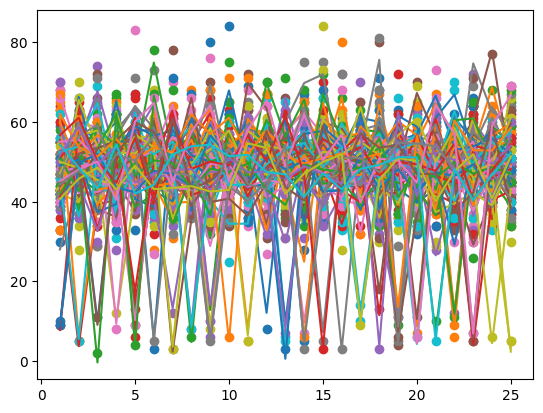

In [79]:
#réalisation de la régression polynomiale de degré 10
Z=range(1,rows,1)
Z=np.array(Z)
polynomial_features=PolynomialFeatures(degree=10)
poly_regression_alg=LinearRegression()
#Construction du modèle de régression linéaire polynomiale
model=Pipeline([
    ("polynomial_features",polynomial_features),
    ("linear_regression",poly_regression_alg)
    ])
Z=Z.reshape(-1,1)
bibliotheque = pd.DataFrame()

for j in range(cols) :
    produit="Produit " + str(j+1)
    x_train,x_test,y_train, y_test =train_test_split(X,df[produit],test_size=1)
    x_train=np.array(x_train)
    x_train=x_train.reshape(-1,1)
    model.fit(x_train,y_train)
    train_prediction=model.predict(x_train)
    predictions=np.concatenate(([produit], train_prediction))
    predictions=pd.DataFrame([predictions],columns=(range(rows,52,1)))
    bibliotheque = pd.concat([bibliotheque,predictions], ignore_index=True)
    plt.plot(Z,train_prediction)
    plt.scatter(Z,y_train)

In [80]:
bibliotheque

,26,27,28,29,30,31,32,33,34,35,...,42,43,44,45,46,47,48,49,50,51
0,Produit 1,8.384935299959693,48.018303246389024,49.19325894238048,56.26501508309505,48.673197226910844,58.06712712995707,49.38930682781668,53.367318055322386,46.94264938678592,...,43.209754343844025,61.05262029889039,60.06729895315132,43.21965263745281,39.801815966541795,43.23495176285272,45.40507831041759,55.697687559491015,49.902044875932035,45.37401472590048
1,Produit 2,45.91947191290615,49.950844082604135,52.853370147405485,41.943648971425546,49.4833885529963,53.256653531251914,55.52190423531408,57.538791919106416,63.281744068377634,...,49.505665832903276,51.89892540421101,52.35981043052857,50.20709137301424,49.60584550313183,50.438272352797185,52.10463145430663,53.466574140447165,68.78096409011164,51.48795615331733
2,Produit 3,52.37906054345683,53.79054446795118,53.23573018567076,43.17720373783311,44.77257334853755,44.57931626861216,45.90361777847073,54.73195985529571,12.861839305669776,...,55.190151095127874,48.67831628645433,45.21235865467395,48.327844437381714,55.06554364379099,49.77368026651209,52.25754902972665,43.26114107429282,59.09937640669057,54.15469640250103
3,Produit 4,43.6594073422726,3.756310510168504,39.226197512905486,40.5944035400731,53.33905323479311,55.10478026068964,46.60576846229159,51.77650254306772,53.172865034113414,...,42.162552989075834,52.74854815901935,51.238471311801106,52.68048357814601,54.88067908183788,48.539154639545444,56.68358648920511,50.22628569377531,35.6670880742291,56.10322177586713
4,Produit 5,47.525606338584765,54.63092825148371,67.79707941216265,51.1503750488325,50.14529372006538,60.66086664131481,50.210631249743216,51.0748337982013,60.08093298933497,...,53.4613467928709,53.746867631910135,48.36903161514667,48.87820257886662,52.326322150812956,56.061894873970886,11.150397854556005,60.15754815831198,53.655633821287864,49.77304871268163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Produit 76,43.90037035284658,49.22950085206074,9.104139894005726,52.45402415764798,57.10697063990054,42.81298067327705,60.8861991493043,43.30936585728139,45.19730039639515,...,46.1166523792065,57.160717336359056,53.584547840902985,54.22396066459012,46.907581900989754,47.09092243142484,37.78856568690506,42.299908913332985,59.474540276919726,38.37739185302169
76,Produit 77,45.19337866245593,48.06977376701076,50.095657795884165,40.50355596624206,60.13659711677616,64.85257402072426,44.92998365948557,57.583777909965704,64.2261344793788,...,56.856318061525656,39.8027448373399,50.82234613045381,50.33667899364633,44.82712573731084,64.21532725660248,57.15099730975459,6.921836038333055,59.13282346293096,66.74836285514166
77,Produit 78,44.315094356372725,47.74902382223209,44.33165075499565,51.96702851611863,50.35183948762133,56.46029032318816,47.554273776308406,46.39207812696114,39.44458216260537,...,51.16717323827439,51.02415271782084,47.40418163298855,54.856658321811125,54.61964035211619,53.93945813523024,48.58262273605797,40.36159928626731,47.16295812488866,40.774348464974906
78,Produit 79,40.70208071039292,45.76843673384997,48.5806832841497,43.067553076396734,49.10715064386105,43.19669910329526,43.46106444382008,43.93769464174534,42.59104571814373,...,51.95392496777481,9.8302649929321,45.476414278520906,50.97040140525985,50.22993080477116,40.15872763465654,47.633583653370636,51.936911492166814,40.78857932028245,51.36895767340525


In [81]:
#Validation du degré polynomial donnant l'erreur des moindres carrés la plus faible
Z=range(1,rows,1)
Z=np.array(Z)
Z=Z.reshape(-1,1)
bibliotheque = pd.DataFrame()
RMSEdataframe = pd.DataFrame()

for i in range (100) :
    polynomial_features=PolynomialFeatures(degree=i)
    poly_regression_alg=LinearRegression()
    #Construction du modèle de régression linéaire polynomiale
    model=Pipeline([
        ("polynomial_features",polynomial_features),
        ("linear_regression",poly_regression_alg)
        ])


    #Boucle de test sur l'ensemble des produits afin de vérifier l'erreur des moindres carrés sur l'ensemble des profils de produit
    for j in range(cols) :
        produit="Produit " + str(j+1)
        i=str(i)
        x_train,x_test,y_train, y_test =train_test_split(X,df[produit],test_size=1)
        x_train=np.array(x_train)
        x_train=x_train.reshape(-1,1)
        model.fit(x_train,y_train)
        train_prediction=model.predict(x_train)
        predictions=np.concatenate(([produit], train_prediction))
        predictions=pd.DataFrame([predictions],columns=(range(1,rows+1,1)))
        bibliotheque = pd.concat([bibliotheque,predictions], ignore_index=True)
        error=str(round(sqrt(mean_squared_error(y_train,train_prediction)),2))
        RMSE=np.concatenate(([produit],[i],[error]))
        RMSE=pd.DataFrame([RMSE])
        RMSEdataframe= pd.concat([RMSEdataframe,RMSE], ignore_index=True)

In [82]:
RMSEdataframe

,0,1,2
0,Produit 1,0,11.08
1,Produit 2,0,8.03
2,Produit 3,0,10.79
3,Produit 4,0,12.24
4,Produit 5,0,11.22
...,...,...,...
7995,Produit 76,99,12.26
7996,Produit 77,99,10.23
7997,Produit 78,99,10.14
7998,Produit 79,99,9.93
